<a href="https://colab.research.google.com/github/SagarHadge0/NLP-projects/blob/main/AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

In [2]:
import os

In [3]:
df = pd.read_csv("AAPL.csv")

In [4]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


In [5]:
df = df["Open"].values

In [6]:
df

array([116.26, 104.55,  85.7 , ...,  26.62,  26.5 ,  26.5 ])

In [7]:
df.shape

(6081,)

In [8]:
df = df.reshape(-1,1)

In [9]:
df

array([[116.26],
       [104.55],
       [ 85.7 ],
       ...,
       [ 26.62],
       [ 26.5 ],
       [ 26.5 ]])

In [10]:
dataset_train = np.array(df[0:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [11]:
dataset_train.shape

(4864, 1)

In [12]:
dataset_test.shape

(1267, 1)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [14]:
#50 Timestep
def create_dataset(df):
  x = []
  y = []
  for i in range (50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [15]:
x_train,y_train = create_dataset(dataset_train)

In [16]:
x_train

array([[0.55074317, 0.4883597 , 0.38793884, ..., 0.79819935, 0.78360237,
        0.75936285],
       [0.4883597 , 0.38793884, 0.4286932 , ..., 0.78360237, 0.75936285,
        0.76564914],
       [0.38793884, 0.4286932 , 0.38905759, ..., 0.75936285, 0.76564914,
        0.78322945],
       ...,
       [0.17111502, 0.17777423, 0.1737787 , ..., 0.14980555, 0.15113739,
        0.14847371],
       [0.17777423, 0.1737787 , 0.16978318, ..., 0.15113739, 0.14847371,
        0.14714187],
       [0.1737787 , 0.16978318, 0.16978318, ..., 0.14847371, 0.14714187,
        0.15380108]])

In [17]:
x_train.shape

(4814, 50)

In [18]:
y_train.shape

(4814,)

In [19]:
x_test,y_test = create_dataset(dataset_test)

In [20]:
x_train = np.reshape(x_train,(x_train.shape[0],x_test.shape[1],1))

In [21]:
x_train.shape

(4814, 50, 1)

In [22]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
x_test.shape

(1217, 50, 1)

In [24]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 96)              │          37,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 96)              │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 96)              │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 96)                  │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss ='mean_squared_error',optimizer = 'adam')

In [27]:
model.fit(x_train,y_train,epochs=15,batch_size=35)

Epoch 1/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0084
Epoch 2/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020
Epoch 3/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015
Epoch 4/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0012
Epoch 5/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0010
Epoch 6/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.0503e-04
Epoch 7/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.1712e-04
Epoch 8/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010
Epoch 9/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0013
Epoch 10/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.7622e-04
Epoch 11/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 6.6144e-04
Epoch 12/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.2956e-04
Epoch 13/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.8678e-04
Epoch 14/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.5882e-04
Epoch 15/15
138

In [28]:
predictions = model.predict(x_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [29]:
predictions

array([[0.15538272],
       [0.15524298],
       [0.15594786],
       ...,
       [0.0865448 ],
       [0.0840777 ],
       [0.08157417]], dtype=float32)

In [30]:
y_test

array([0.14980555, 0.15646476, 0.16445581, ..., 0.07319802, 0.07255873,
       0.07255873])

In [31]:
predictions = scaler.inverse_transform(predictions)

In [32]:
predictions

array([[42.04689 ],
       [42.02066 ],
       [42.152973],
       ...,
       [29.125322],
       [28.662224],
       [28.192287]], dtype=float32)

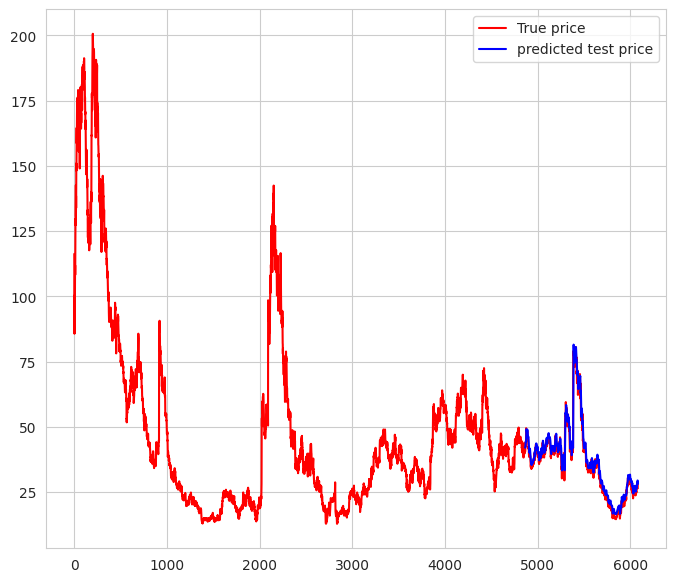

In [33]:
fig,ax = plt.subplots(figsize=(8,7))
plt.plot(df,color='red',label='True price')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color="blue",label="predicted test price")
plt.legend()
plt.show()

In [34]:
range(len(y_train)+50,len(y_train)+50+len(predictions))

range(4864, 6081)